### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Load the dataset 

In [2]:
data = pd.read_csv('credit.csv')

In [3]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [4]:
data.shape

(100000, 28)

In [5]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,100000.0,8.063150e+04,4.330149e+04,5634.000000,4.313275e+04,8.063150e+04,1.181302e+05,1.556290e+05
Customer_ID,100000.0,2.598267e+04,1.434054e+04,1006.000000,1.366450e+04,2.577700e+04,3.838500e+04,5.099900e+04
Month,100000.0,4.500000e+00,2.291299e+00,1.000000,2.750000e+00,4.500000e+00,6.250000e+00,8.000000e+00
Age,100000.0,3.331634e+01,1.076481e+01,14.000000,2.400000e+01,3.300000e+01,4.200000e+01,5.600000e+01
SSN,100000.0,5.004617e+08,2.908267e+08,81349.000000,2.451686e+08,5.006886e+08,7.560027e+08,9.999934e+08
Annual_Income,100000.0,5.050512e+04,3.829942e+04,7005.930000,1.934297e+04,3.699971e+04,7.168347e+04,1.799873e+05
Monthly_Inhand_Salary,100000.0,4.197271e+03,3.186432e+03,303.645417,1.626594e+03,3.095905e+03,5.957715e+03,1.520463e+04
Num_Bank_Accounts,100000.0,5.368820e+00,2.593314e+00,0.000000,3.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Num_Credit_Card,100000.0,5.533570e+00,2.067098e+00,0.000000,4.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Interest_Rate,100000.0,1.453208e+01,8.741330e+00,1.000000,7.000000e+00,1.300000e+01,2.000000e+01,3.400000e+01


In [52]:
data['Occupation'].value_counts()

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

In [53]:
data['Credit_Mix'].value_counts()

Standard    45848
Good        30384
Bad         23768
Name: Credit_Mix, dtype: int64

In [54]:
data['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [55]:
data['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: Payment_Behaviour, dtype: int64

In [56]:
data['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

### Exploratory Data Analysis

#### Visualisations

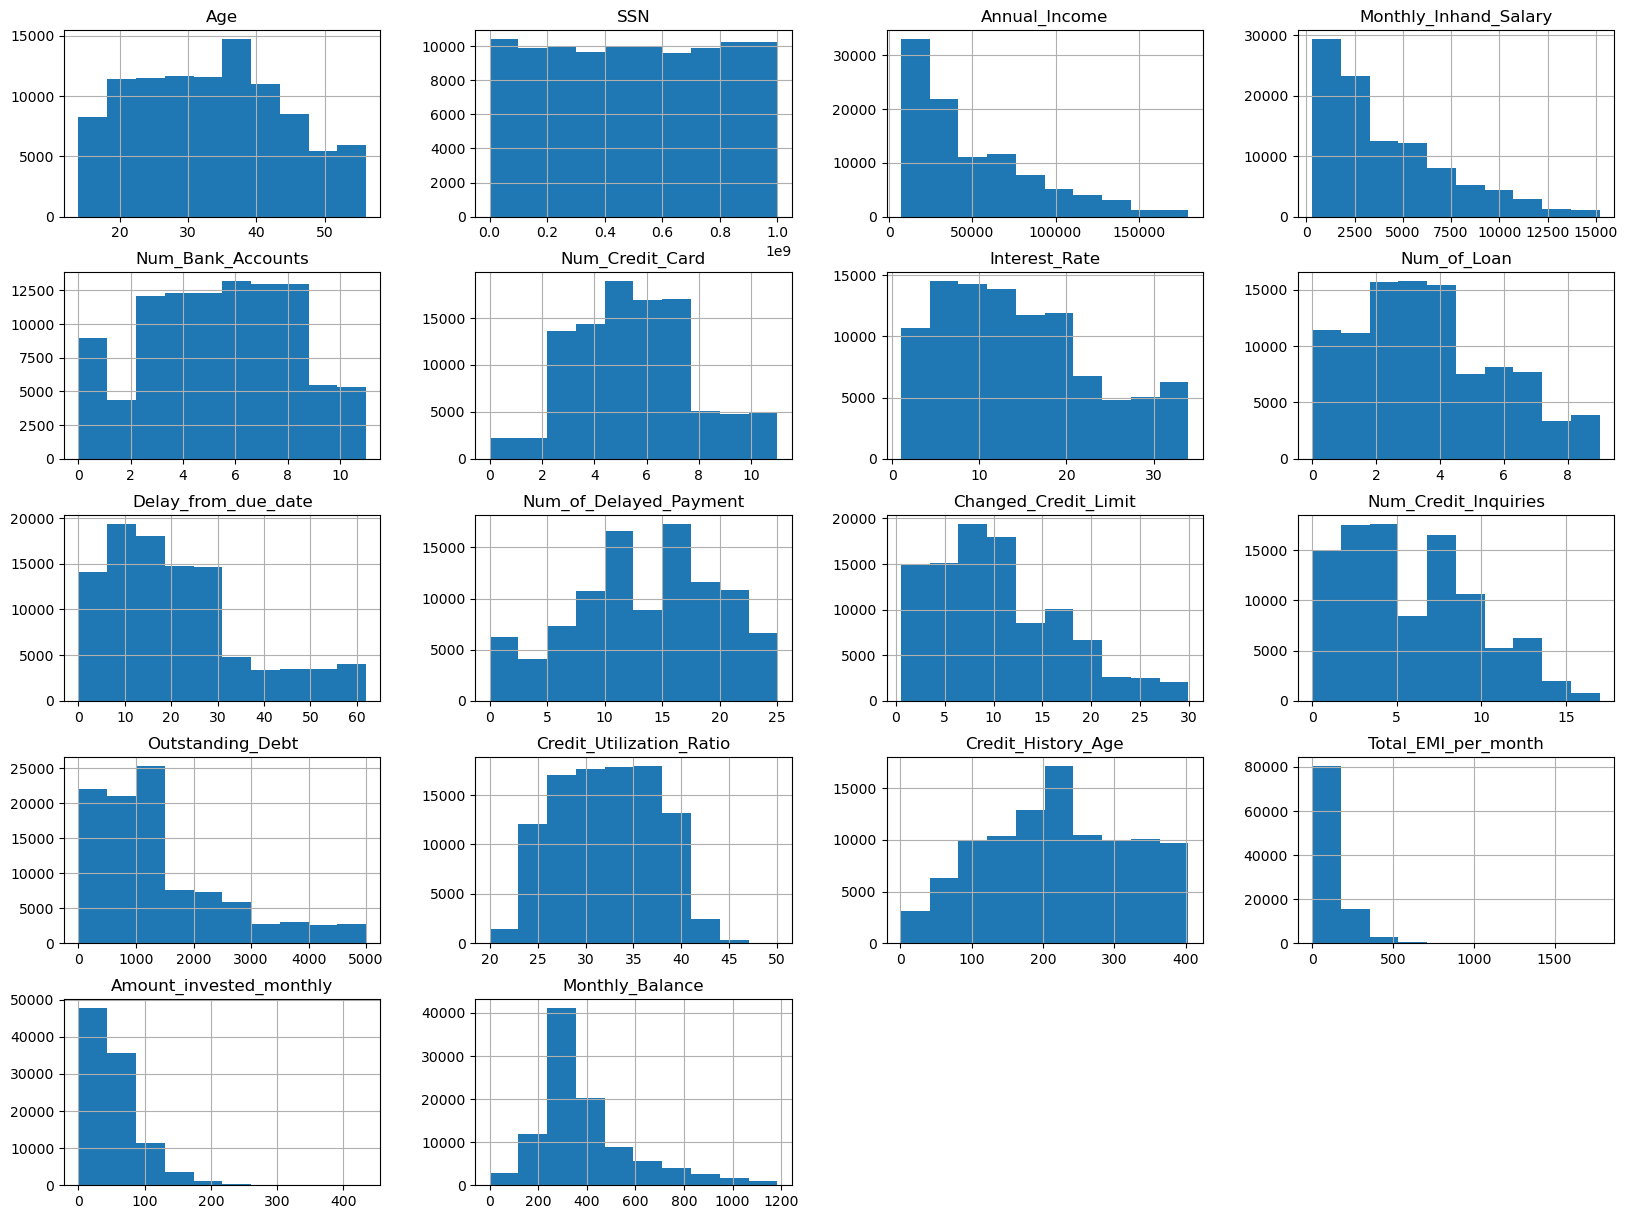

In [57]:
hist_graph = data.select_dtypes(include='float64')
hist_graph.hist(figsize=(20,15))
plt.show()

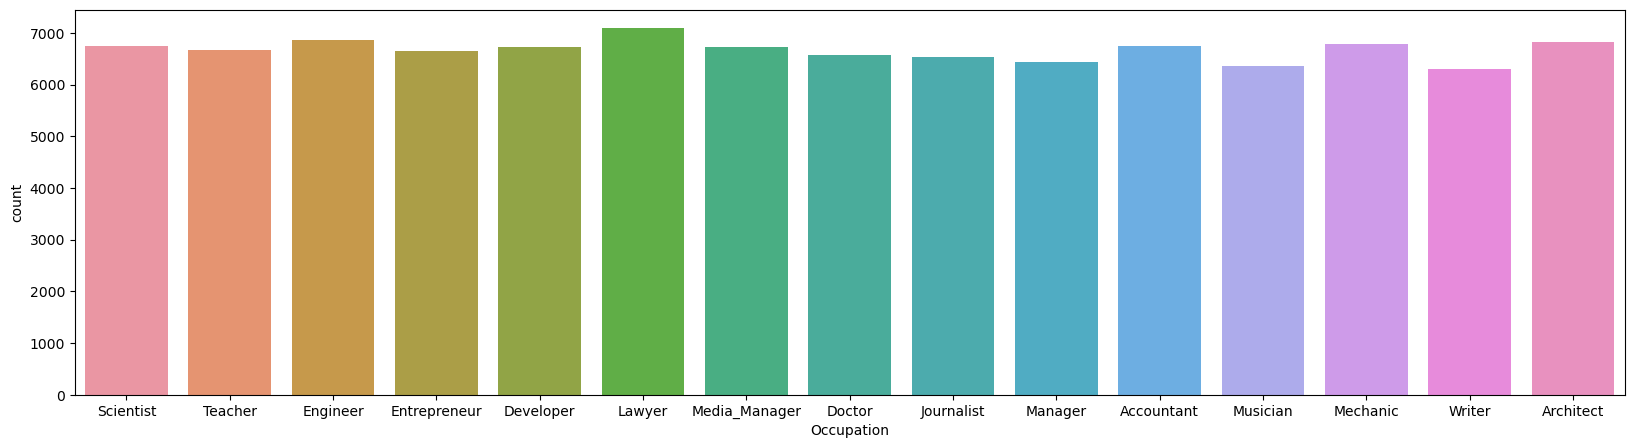

In [58]:
plt.figure(figsize=(20,5))
sns.countplot(x = 'Occupation',data=data);

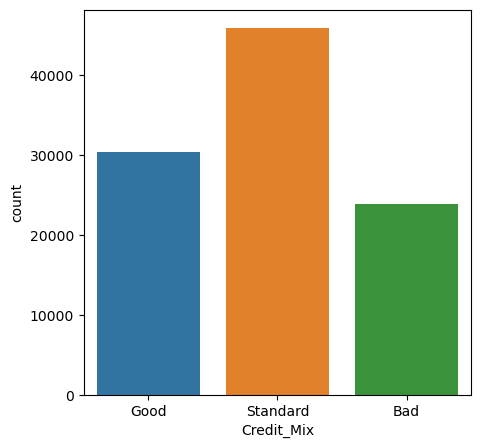

In [59]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'Credit_Mix',data=data);

In credit_mix standard is higher.

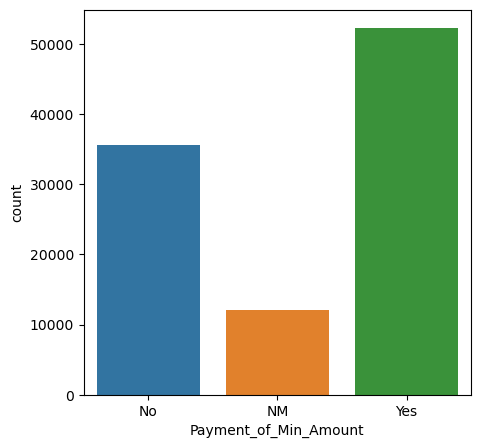

In [60]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'Payment_of_Min_Amount',data=data);

<Axes: xlabel='Payment_Behaviour', ylabel='count'>

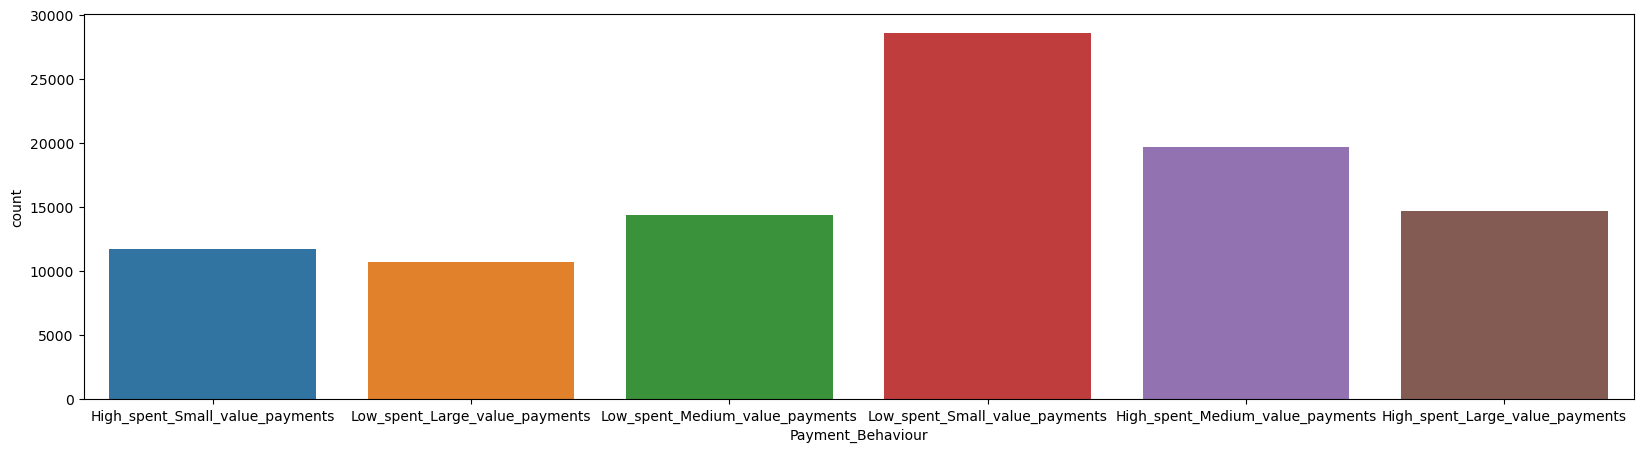

In [61]:
plt.figure(figsize=(20,5))
sns.countplot(x ='Payment_Behaviour',data=data)

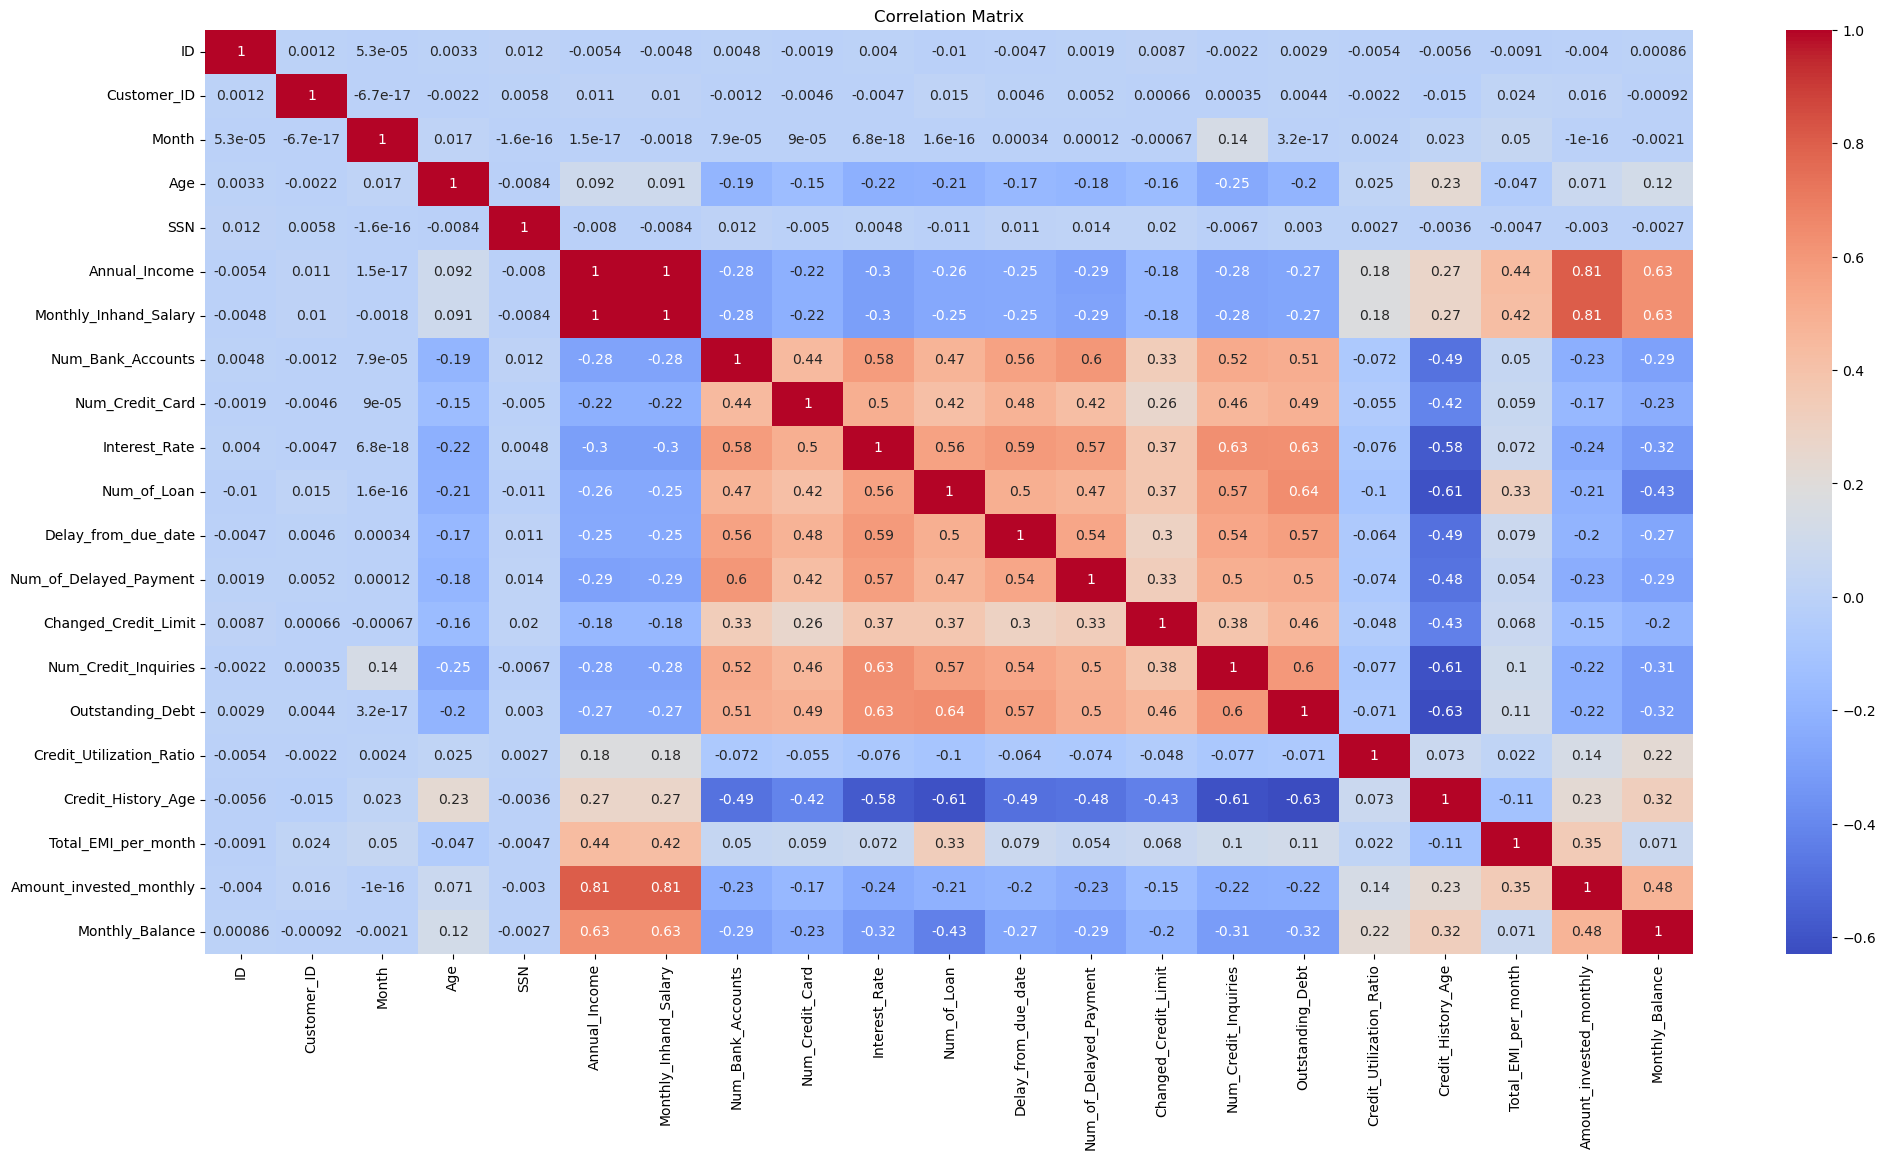

In [62]:
plt.figure(figsize=(24,12))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Preprocessing

In [63]:
data.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

No missing values 

#### Outlier Detection

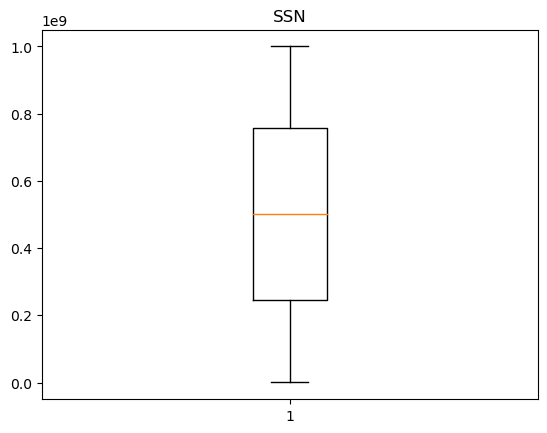

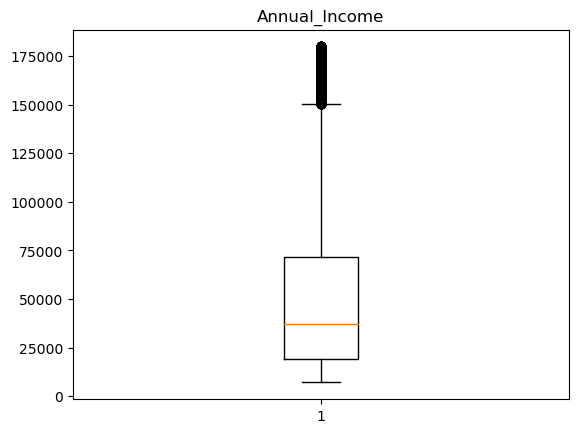

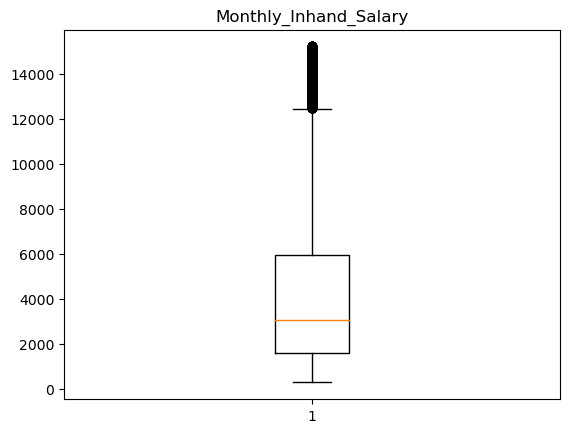

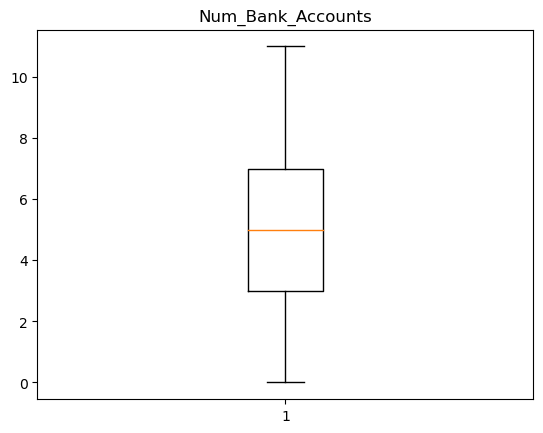

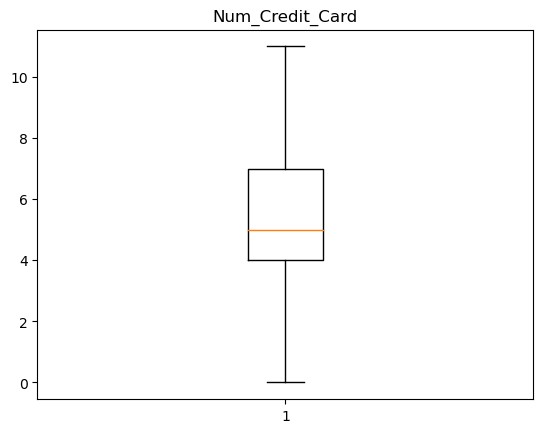

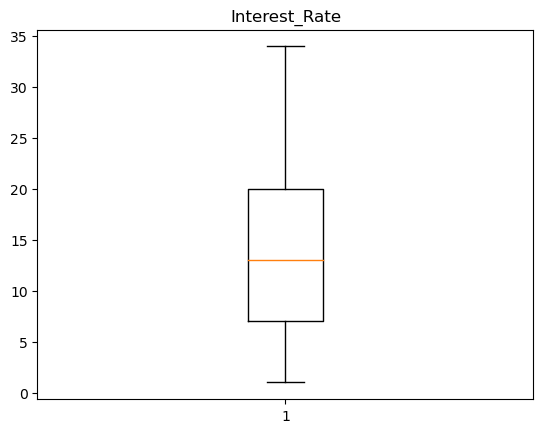

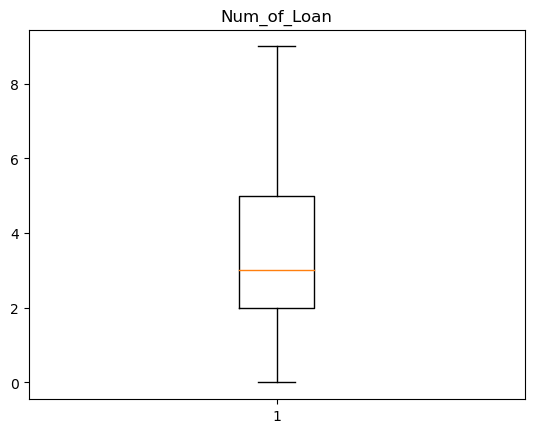

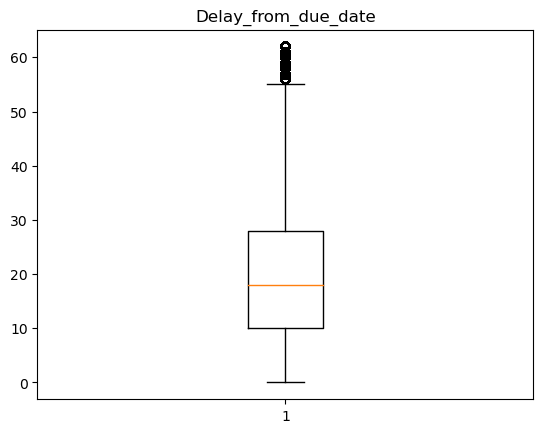

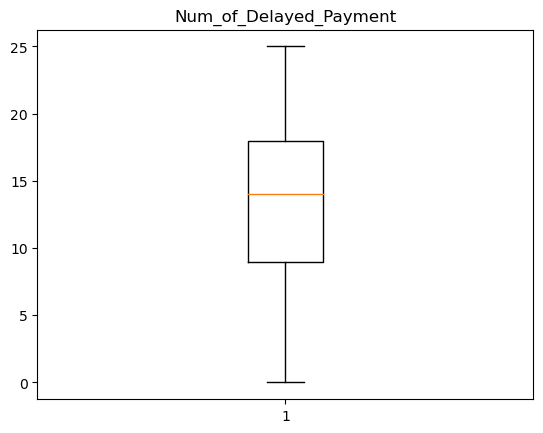

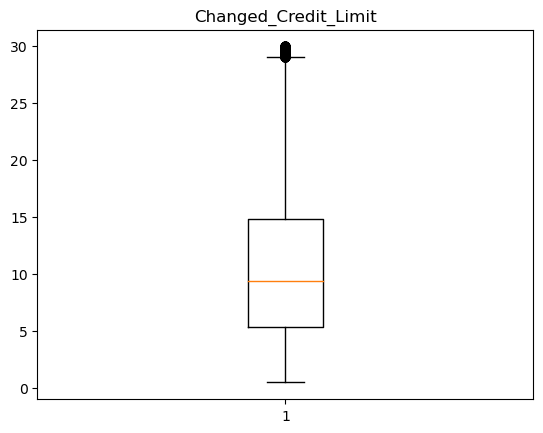

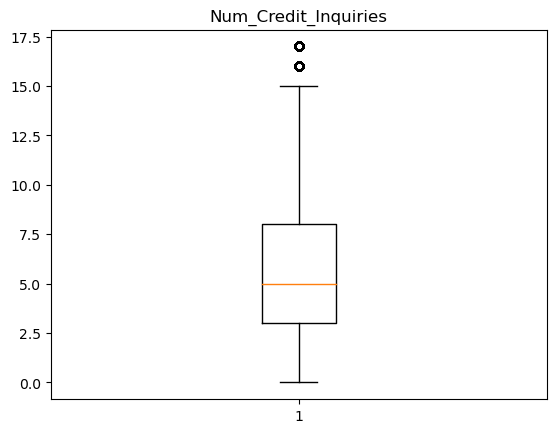

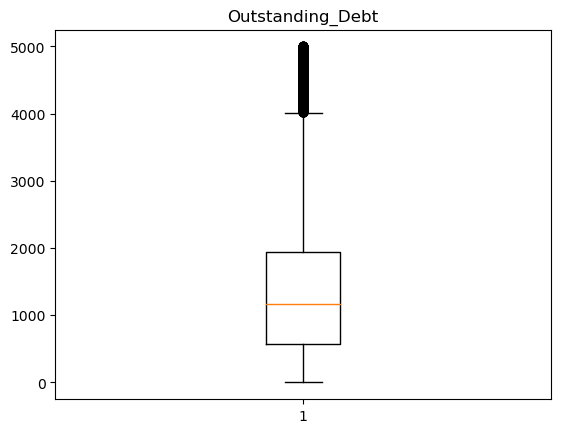

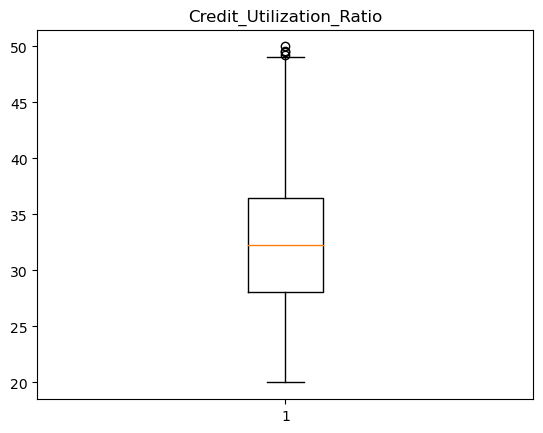

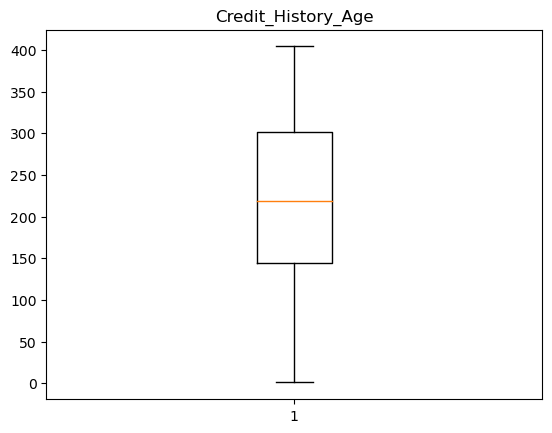

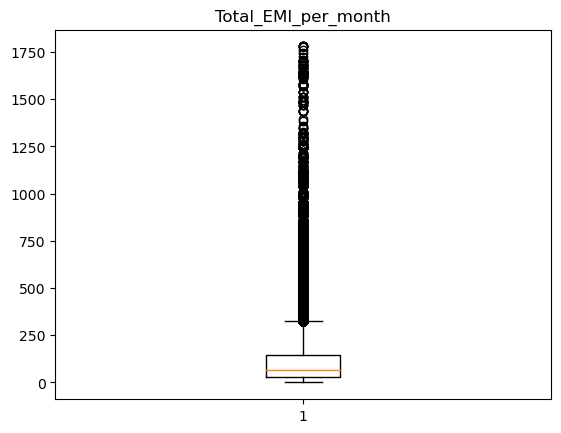

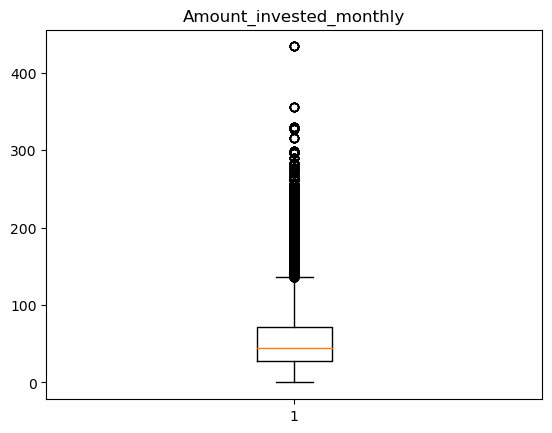

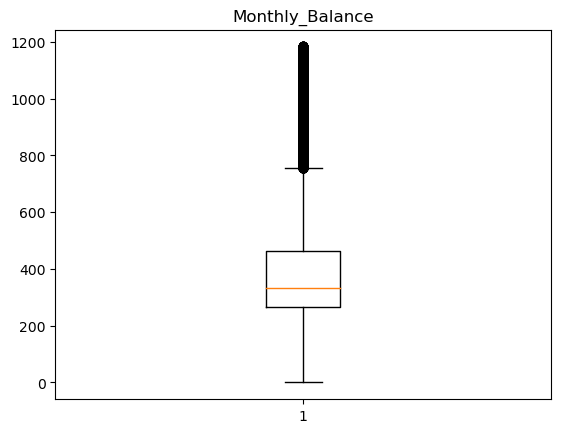

In [64]:
num_columns = ['SSN','Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']
for i in num_columns:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)
plt.show()

Removing columns

In [4]:
data=data.drop('ID',axis=1)
data=data.drop('Customer_ID',axis=1)
data=data.drop('Name',axis=1)
data=data.drop('Age',axis=1)

In [5]:
data.head()

,Month,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,2,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,3,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,4,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


#### Label Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
cols = ['Occupation','Type_of_Loan','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score']

for col in cols:
    data[col] = le.fit_transform(data[col])

In [8]:
data.head()

,Month,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,821000265.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,26.822620,265.0,1,49.574949,21.46538,2,312.494089,0
1,2,821000265.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,31.944960,266.0,1,49.574949,21.46538,3,284.629162,0
2,3,821000265.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,28.609352,267.0,1,49.574949,21.46538,4,331.209863,0
3,4,821000265.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,31.377862,268.0,1,49.574949,21.46538,5,223.451310,0
4,5,821000265.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,24.797347,269.0,1,49.574949,21.46538,1,341.489231,0


#### Standard Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [10]:
cols = ['SSN','Annual_Income','Type_of_Loan','Monthly_Inhand_Salary','Outstanding_Debt','Total_EMI_per_month','Monthly_Balance']
for col in cols:
    data[col] = std.fit_transform(data[col].values.reshape(-1, 1))

In [11]:
data.head()

,Month,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,1.102169,12,-0.819625,-0.744544,3.0,4.0,3.0,4.0,-1.788587,...,1,-0.533485,26.822620,265.0,1,-0.439448,21.46538,2,-0.397733,0
1,2,1.102169,12,-0.819625,-0.744544,3.0,4.0,3.0,4.0,-1.788587,...,1,-0.533485,31.944960,266.0,1,-0.439448,21.46538,3,-0.535916,0
2,3,1.102169,12,-0.819625,-0.744544,3.0,4.0,3.0,4.0,-1.788587,...,1,-0.533485,28.609352,267.0,1,-0.439448,21.46538,4,-0.304920,0
3,4,1.102169,12,-0.819625,-0.744544,3.0,4.0,3.0,4.0,-1.788587,...,1,-0.533485,31.377862,268.0,1,-0.439448,21.46538,5,-0.839300,0
4,5,1.102169,12,-0.819625,-0.744544,3.0,4.0,3.0,4.0,-1.788587,...,1,-0.533485,24.797347,269.0,1,-0.439448,21.46538,1,-0.253945,0


### Data Split

In [12]:
X = data.drop(['Credit_Score'],axis=1)
y = data['Credit_Score']

### Handling imbalanced data

In [13]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

# Assuming x and y are features and target variable
X = data.drop(['Credit_Score'],axis=1)
y = data['Credit_Score']

ros = RandomOverSampler(random_state=42)

# Fit predictor and target variable
X_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({2: 53174, 1: 28998, 0: 17828})
Resample dataset shape Counter({0: 53174, 2: 53174, 1: 53174})


### Train Test Split

In [14]:
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(X_ros, y_ros, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [16]:
model = lr.fit(X_train_temp,y_train_temp)

In [17]:
pred_lr = model.predict(X_val)

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [19]:
confusion_matrix(y_val,pred_lr)

array([[6334,  300, 1300],
       [1195, 5347, 1387],
       [2153, 1910, 4002]], dtype=int64)

In [20]:
pred_lr

array([1, 2, 2, ..., 2, 0, 1])

In [28]:
print('Accuracy =',accuracy_score(y_val,pred_lr))

Accuracy = 0.6554246071547978


### KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
metric_k = []
neighbors = np.arange(3,15)

In [23]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    classifier.fit(X_train_temp,y_train_temp)
    y_pred = classifier.predict(X_val)
    acc = accuracy_score(y_val,y_pred)
    metric_k.append(acc)

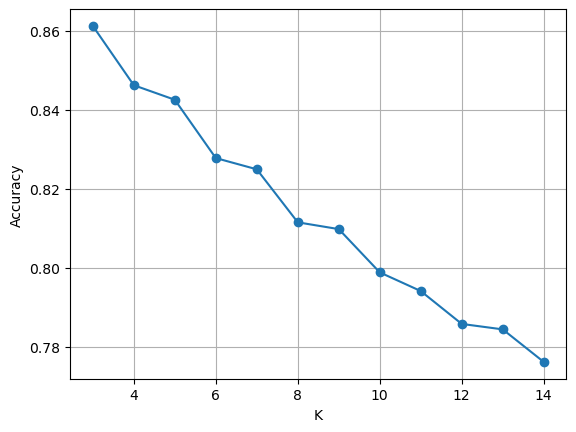

In [24]:
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()

In [25]:
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
classifier.fit(X_train_temp,y_train_temp)
y_pred = classifier.predict(X_val)
acc = accuracy_score(y_val,y_pred)
metric_k.append(acc)

In [26]:
print('Accuracy =',accuracy_score(y_val,y_pred))

Accuracy = 0.8611668338348378


### Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt_cls=DecisionTreeClassifier()
model=dt_cls.fit(X_train_temp,y_train_temp)
y_pred_dt=model.predict(X_val)

In [22]:
confusion_matrix(y_val,y_pred_dt)

array([[7684,   33,  217],
       [  78, 7145,  706],
       [ 795, 1214, 6056]], dtype=int64)

In [23]:
accuracy_score(y_val,y_pred_dt)

0.8728268137746573

### Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf_cls=RandomForestClassifier()
model_rf=rf_cls.fit(X_train_temp,y_train_temp)
y_pred_rf=model_rf.predict(X_val)

In [17]:
confusion_matrix(y_val,y_pred_rf)

array([[7839,    4,   91],
       [  16, 7651,  262],
       [ 678, 1024, 6363]], dtype=int64)

In [18]:
accuracy_score(y_val,y_pred_rf)

0.9132815112002675

### Hyper parameter tuning

In [19]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50,100],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create an instance of the Random Forest classifier
rf = RandomForestClassifier()

# Create GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train_temp,y_train_temp)

# Get the best model
best_rf = grid_search.best_estimator_

# Evaluate the best model on the test set
y_val_pred = best_rf.predict(X_val)

val_accuracy = accuracy_score(y_val,y_val_pred)

print("Confusion matrix : \n", confusion_matrix(y_val,y_val_pred))
print('Accuracy score on the validation set', val_accuracy)

Confusion matrix : 
 [[7841    2   91]
 [  22 7652  255]
 [ 690 1025 6350]]
Accuracy score on the validation set 0.9128635907723169


Best model is RandomForestClassifier.
Accuracy after hyper parameter tuning is 91%